In [1]:
import pandas as pd
import numpy as np
import keras

from sklearn.model_selection import train_test_split
#i#mport imblearn
#from imblearn.over_sampling import SMOTE
from keras import Sequential
from keras.layers import Dense,Dropout,BatchNormalization,Input
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import keras_tuner as k
from hyperopt import fmin, tpe, Trials
from keras import Sequential
from keras.layers import Dense
#pip install keras-tuner --upgrade
#pip install hyperopt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from mlxtend.plotting  import plot_decision_regions 

Using TensorFlow backend


In [2]:
df=pd.read_csv("1.ushape.csv",header=None)

In [3]:
df.shape

(100, 3)

In [4]:
df.head()

,0,1,2
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0


In [5]:
df.tail()

,0,1,2
95,1.699453,0.587720,1.0
96,0.218623,-0.652521,1.0
97,0.952914,-0.419766,1.0
98,-1.318500,0.423112,0.0
99,-1.296818,0.184147,0.0


In [6]:
df.isnull().sum()

0    0
1    0
2    0
dtype: int64

In [7]:
x=df.iloc[0:,:2]

In [8]:
y=df.iloc[0:,2]

In [9]:
x

,0,1
0,0.031595,0.986988
1,2.115098,-0.046244
2,0.882490,-0.075756
3,-0.055144,-0.037332
4,0.829545,-0.539321
...,...,...
95,1.699453,0.587720
96,0.218623,-0.652521
97,0.952914,-0.419766
98,-1.318500,0.423112


In [10]:
df.duplicated().sum()

0

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10)

In [12]:
x_train.value_counts()

0          1        
-1.318500   0.423112    1
 1.170376   0.598407    1
 1.094878  -0.368418    1
 1.056146  -1.035702    1
 1.026588   0.377825    1
                       ..
 0.127331  -0.379655    1
 0.068733   0.566485    1
 0.031595   0.986988    1
 0.024936   0.107480    1
 2.181372  -0.022917    1
Length: 90, dtype: int64

In [13]:
y_train.value_counts()

1.0    46
0.0    44
Name: 2, dtype: int64

In [14]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x_trainp = std.fit_transform(x_train)
x_testp = std.transform(x_test)

In [15]:
trials = Trials()

In [18]:
from keras.regularizers import L1,L2,L1L2

In [261]:
def modellss(hp):
    model=Sequential()
    model.add(Input(shape=(2,)))
    
    for i in range(hp.Int("hiddenlayers",min_value=5,max_value=30)):
                model.add(Dense(units=hp.Int("neurons{}".format(i),min_value=1,max_value=25),activation="relu",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001),kernel_initializer="he_normal"))

                    
                
    model.add(Dense(1,activation="sigmoid"))
    model.compile(loss='binary_crossentropy',optimizer='sgd', metrics=['accuracy'])
    return model

In [262]:
tuner=k.RandomSearch(modellss,objective="val_accuracy",max_trials=25,directory="C:\\Users\\admin\\main",project_name="f17")

In [263]:
tuner.search(x_trainp,y_train,epochs=40,validation_data=(x_test,y_test))

Trial 25 Complete [00h 00m 15s]
val_accuracy: 0.8999999761581421

Best val_accuracy So Far: 0.8999999761581421
Total elapsed time: 00h 05m 09s


In [264]:
tuner.results_summary()

Results summary
Results in C:\Users\admin\main\f17
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 05 summary
Hyperparameters:
hiddenlayers: 24
neurons0: 12
neurons1: 13
neurons2: 13
neurons3: 11
neurons4: 15
neurons5: 7
neurons6: 1
neurons7: 18
neurons8: 12
neurons9: 25
neurons10: 9
neurons11: 25
neurons12: 18
neurons13: 22
neurons14: 19
neurons15: 16
neurons16: 5
neurons17: 2
neurons18: 15
neurons19: 18
neurons20: 8
neurons21: 3
neurons22: 9
neurons23: 12
neurons24: 2
neurons25: 3
neurons26: 19
Score: 0.8999999761581421

Trial 07 summary
Hyperparameters:
hiddenlayers: 14
neurons0: 4
neurons1: 2
neurons2: 12
neurons3: 23
neurons4: 16
neurons5: 4
neurons6: 25
neurons7: 19
neurons8: 24
neurons9: 13
neurons10: 10
neurons11: 15
neurons12: 17
neurons13: 22
neurons14: 10
neurons15: 18
neurons16: 14
neurons17: 12
neurons18: 4
neurons19: 20
neurons20: 13
neurons21: 9
neurons22: 4
neurons23: 3
neurons24: 12
neurons25: 22
neurons26: 17
Score: 0.8999999761581421

Tr

In [265]:
tuner.get_best_hyperparameters()[0].values

{'hiddenlayers': 24,
 'neurons0': 12,
 'neurons1': 13,
 'neurons2': 13,
 'neurons3': 11,
 'neurons4': 15,
 'neurons5': 7,
 'neurons6': 1,
 'neurons7': 18,
 'neurons8': 12,
 'neurons9': 25,
 'neurons10': 9,
 'neurons11': 25,
 'neurons12': 18,
 'neurons13': 22,
 'neurons14': 19,
 'neurons15': 16,
 'neurons16': 5,
 'neurons17': 2,
 'neurons18': 15,
 'neurons19': 18,
 'neurons20': 8,
 'neurons21': 3,
 'neurons22': 9,
 'neurons23': 12,
 'neurons24': 2,
 'neurons25': 3,
 'neurons26': 19}

In [266]:
fmodel = tuner.get_best_models(num_models=1)[0]

In [267]:
fmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                36        
                                                                 
 dense_1 (Dense)             (None, 13)                169       
                                                                 
 dense_2 (Dense)             (None, 13)                182       
                                                                 
 dense_3 (Dense)             (None, 11)                154       
                                                                 
 dense_4 (Dense)             (None, 15)                180       
                                                                 
 dense_5 (Dense)             (None, 7)                 112       
                                                                 
 dense_6 (Dense)             (None, 1)                 8

In [268]:
history=fmodel.fit(x_trainp,y_train,batch_size=10,epochs=40,validation_split=0.1)

Epoch 1/40
9/9 [==============================] - 5s 87ms/step - loss: 1.2085 - accuracy: 0.8272 - val_loss: 1.2555 - val_accuracy: 0.5556
Epoch 2/40
9/9 [==============================] - 0s 10ms/step - loss: 1.1671 - accuracy: 0.7901 - val_loss: 1.2647 - val_accuracy: 0.6667
Epoch 3/40
9/9 [==============================] - 0s 10ms/step - loss: 1.1485 - accuracy: 0.8519 - val_loss: 1.2460 - val_accuracy: 0.6667
Epoch 4/40
9/9 [==============================] - 0s 11ms/step - loss: 1.1425 - accuracy: 0.8765 - val_loss: 1.2760 - val_accuracy: 0.6667
Epoch 5/40
9/9 [==============================] - 0s 11ms/step - loss: 1.1229 - accuracy: 0.8642 - val_loss: 1.2968 - val_accuracy: 0.7778
Epoch 6/40
9/9 [==============================] - 0s 10ms/step - loss: 1.1153 - accuracy: 0.8765 - val_loss: 1.2392 - val_accuracy: 0.6667
Epoch 7/40
9/9 [==============================] - 0s 10ms/step - loss: 1.1129 - accuracy: 0.8642 - val_loss: 1.2587 - val_accuracy: 0.7778
Epoch 8/40
9/9 [===========

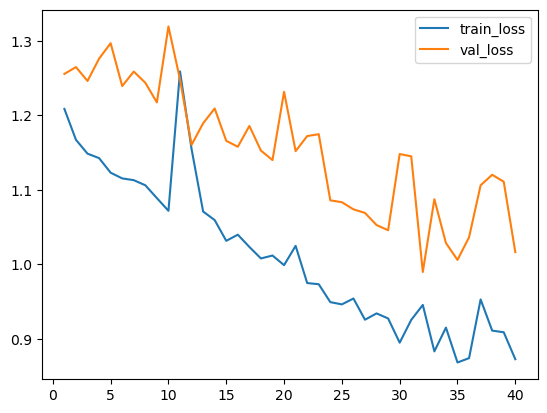

In [269]:
plt.plot(range(1,41),history.history["loss"],label="train_loss")
plt.plot(range(1,41),history.history["val_loss"],label="val_loss")
plt.legend()

In [270]:
history.history['val_loss']

[1.2555433511734009,
 1.2646886110305786,
 1.2460428476333618,
 1.2759904861450195,
 1.2967581748962402,
 1.2392046451568604,
 1.2586590051651,
 1.2436373233795166,
 1.217280387878418,
 1.3191959857940674,
 1.2480521202087402,
 1.160299301147461,
 1.1892647743225098,
 1.2090935707092285,
 1.1656782627105713,
 1.1577266454696655,
 1.185669183731079,
 1.1525466442108154,
 1.1398556232452393,
 1.2315573692321777,
 1.1518566608428955,
 1.1721022129058838,
 1.1745798587799072,
 1.0857765674591064,
 1.083295226097107,
 1.073732614517212,
 1.0688928365707397,
 1.0526326894760132,
 1.0456640720367432,
 1.1479802131652832,
 1.144871473312378,
 0.9896601438522339,
 1.0873339176177979,
 1.0285255908966064,
 1.0058311223983765,
 1.0362138748168945,
 1.1060092449188232,
 1.1201187372207642,
 1.110766887664795,
 1.0162907838821411]

In [271]:
predicted=fmodel.predict(x_test)

1/1 [==============================] - 0s 221ms/step


In [272]:
predicted=np.where(predicted>0.5,1,0)

In [273]:
accuracy_score(y_test,predicted)

0.7

In [274]:
confusion_matrix(y_test,predicted)

array([[5, 1],
       [2, 2]], dtype=int64)

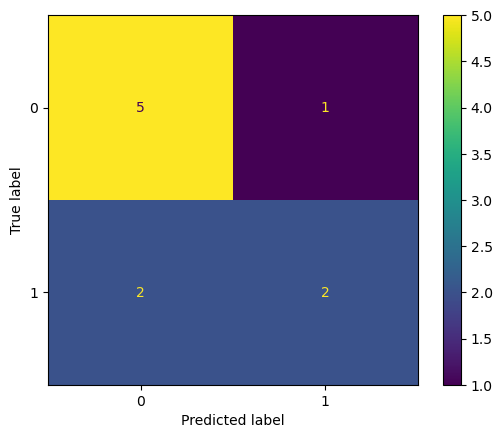

In [275]:

cm = confusion_matrix(y_test,predicted)
va = ConfusionMatrixDisplay(cm)
va.plot()
plt.show()

In [276]:
#pip install mlxtend

9600/9600 [==============================] - 34s 4ms/step


<AxesSubplot:>

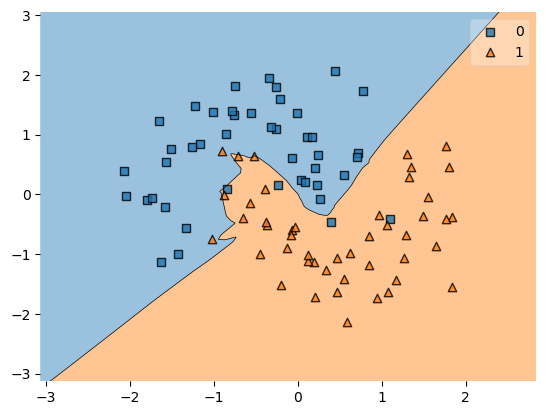

In [277]:
y_train_int = y_train.values.astype(int)
plot_decision_regions(x_trainp, y_train_int, clf=fmodel)

In [278]:
y_test_int = y_test.values.astype(int)

9600/9600 [==============================] - 40s 4ms/step


<AxesSubplot:>

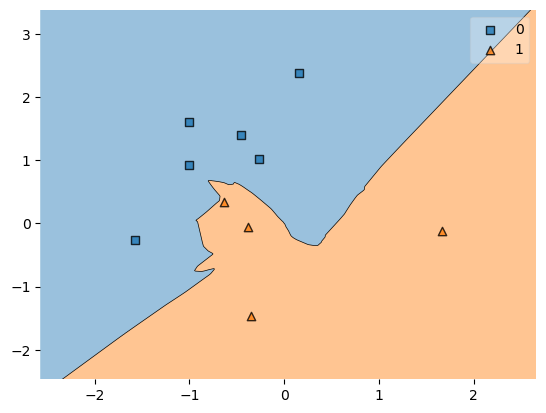

In [279]:

plot_decision_regions(x_testp,y_test_int,clf=fmodel)